<a href="https://colab.research.google.com/github/Jeet8204/ML-Algorithms/blob/main/detecting_cancer_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# prompt: from google.colab import files
# uploaded = files.upload()

from google.colab import files
uploaded = files.upload()


Saving gene_expression.csv to gene_expression.csv


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("gene_expression.csv")


In [ ]:
df.head()


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

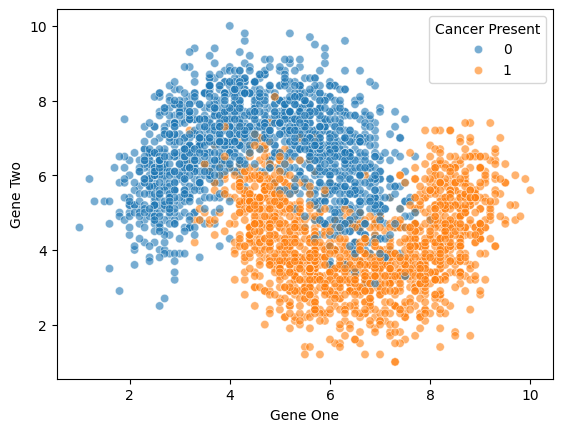

In [11]:
sns.scatterplot(data= df, x= 'Gene One', y= 'Gene Two', hue= "Cancer Present", alpha = 0.6)

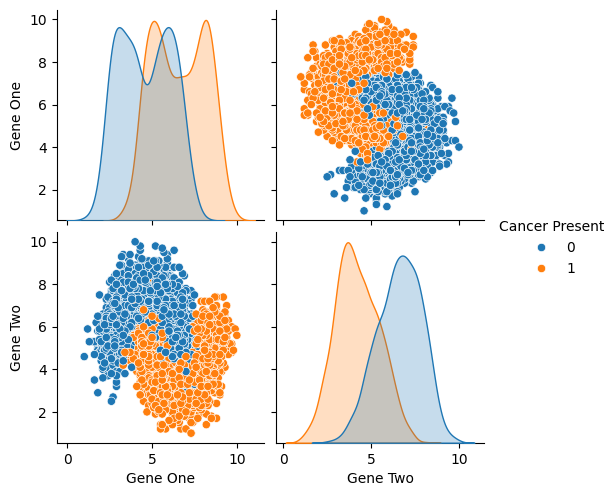

In [12]:
sns.pairplot(data = df, hue= "Cancer Present")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
full_test = pd.concat([X_test,y_test],axis=1)

In [26]:
len(full_test)

900

<Axes: xlabel='Gene One', ylabel='Gene Two'>

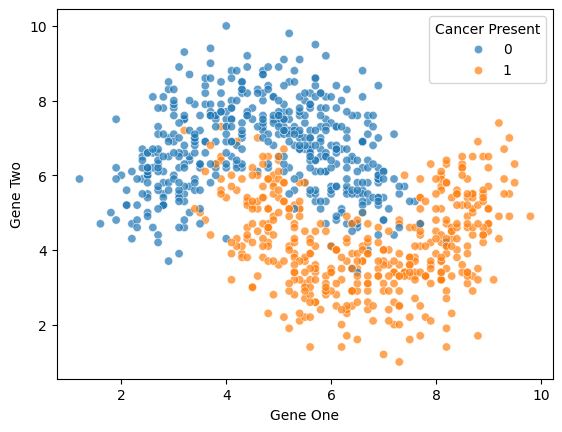

In [29]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)


In [30]:
# MODEL Evaluation
y_pred = knn_model.predict(scaled_X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [33]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

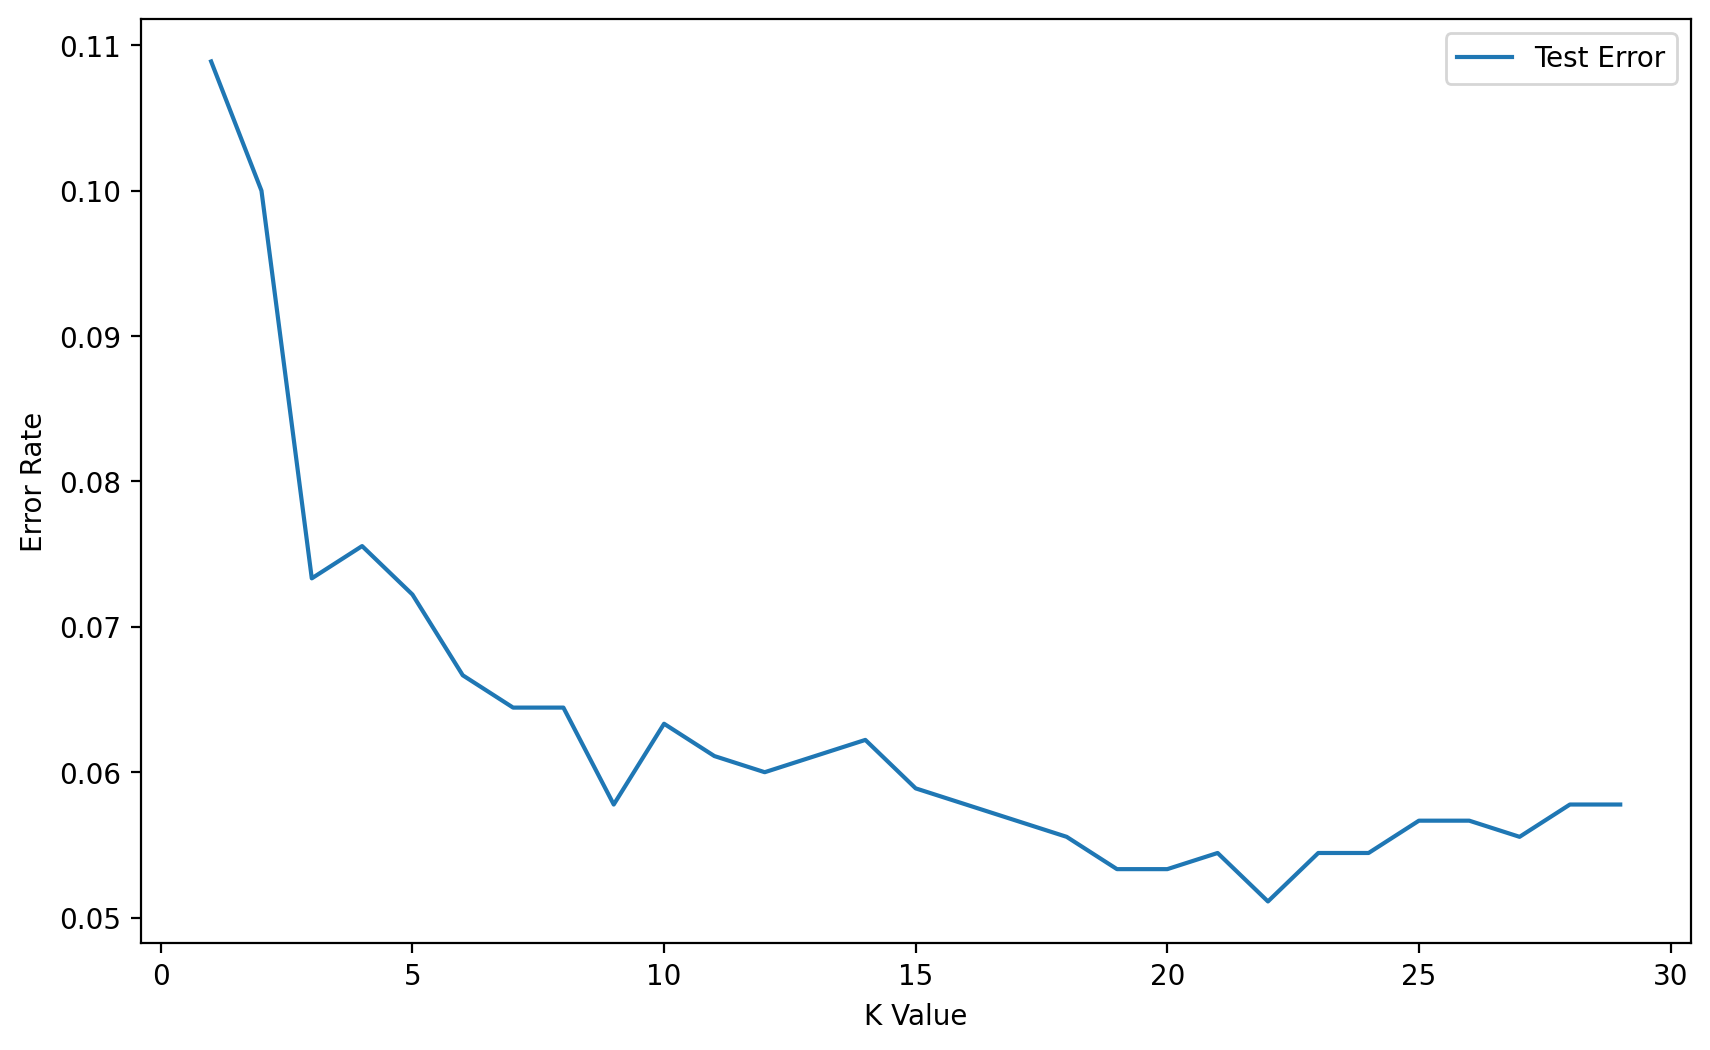

In [34]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [35]:
scaler = StandardScaler()

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [38]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline(operations)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
k_values = list(range(1,20))

In [43]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [44]:
param_grid = {'knn__n_neighbors': k_values}

In [45]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [46]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [47]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [49]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90428571, 0.90619048, 0.92095238, 0.91333333, 0.92428571,
       0.92047619, 0.92428571, 0.92571429, 0.9247619 , 0.92238095,
       0.9247619 , 0.92380952, 0.92809524, 0.92857143, 0.92809524,
       0.92904762, 0.92857143, 0.92857143, 0.92714286])

In [50]:
# FINAL MODEL
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler',scaler),('knn14',knn14)]

In [51]:
pipe = Pipeline(operations)

In [52]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [53]:
pipe_pred = pipe.predict(X_test)

In [54]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [55]:
single_sample = X_test.iloc[40]

In [56]:
single_sample

,194
Gene One,3.8
Gene Two,6.3


In [57]:
pipe.predict(single_sample.values.reshape(1, -1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [58]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.92857143, 0.07142857]])